In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [730]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [731]:
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [732]:
train.shape

(2400, 14)

In [733]:
# number of atoms in each unit cell
train.iloc[:,[3,4,5]].multiply(train.iloc[:,2],axis=0).head()

,percent_atom_al,percent_atom_ga,percent_atom_in
0,50.0,30.0,0.0
1,50.0,30.0,0.0
2,32.5,7.5,0.0
3,22.5,0.0,7.5
4,0.0,50.0,30.0


### Check if spacegroups present in train and test are similar

In [734]:
set(train.spacegroup.unique())

{12, 33, 167, 194, 206, 227}

In [735]:
set(test.spacegroup.unique())


{12, 33, 167, 194, 206, 227}

In [736]:
set(train.number_of_total_atoms.unique())

{10.0, 20.0, 30.0, 40.0, 60.0, 80.0}

In [737]:
set(test.number_of_total_atoms.unique())

{10.0, 20.0, 30.0, 40.0, 60.0, 80.0}

<IPython.core.display.Javascript object>


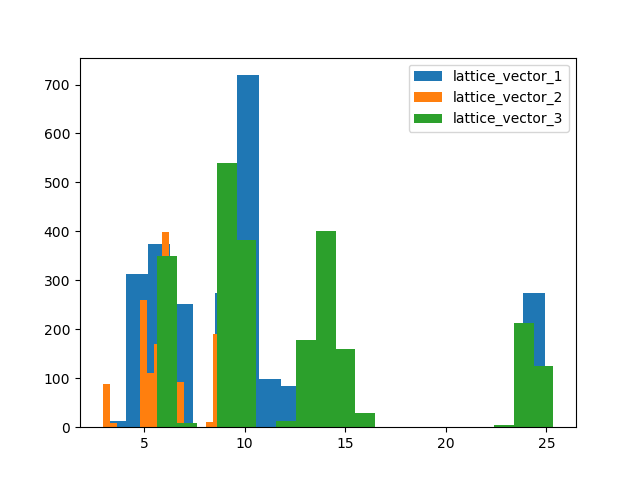

In [738]:
plt.figure()
plt.hist(train.lattice_vector_1_ang,bins=20,label='lattice_vector_1')
plt.hist(train.lattice_vector_2_ang,bins=20,label='lattice_vector_2')
plt.hist(train.lattice_vector_3_ang,bins=20,label='lattice_vector_3')
plt.legend()

<IPython.core.display.Javascript object>


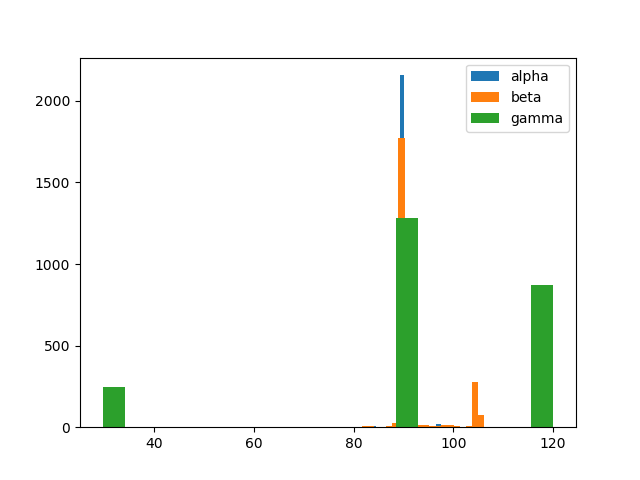

In [739]:
plt.figure()
plt.hist(train.lattice_angle_alpha_degree,bins=20,label='alpha')
plt.hist(train.lattice_angle_beta_degree,bins=20,label='beta')
plt.hist(train.lattice_angle_gamma_degree,bins=20,label='gamma')
plt.legend()

### Any correlation between space group and $E_{Gap}$ or $E_{Formation}$?

<IPython.core.display.Javascript object>


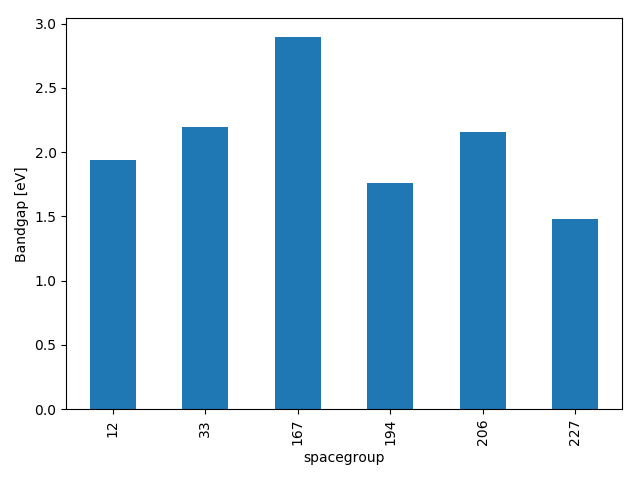

In [740]:
plt.figure()
train.groupby('spacegroup').mean().bandgap_energy_ev.plot.bar()
plt.ylabel("Bandgap [eV]")
plt.tight_layout()


<IPython.core.display.Javascript object>


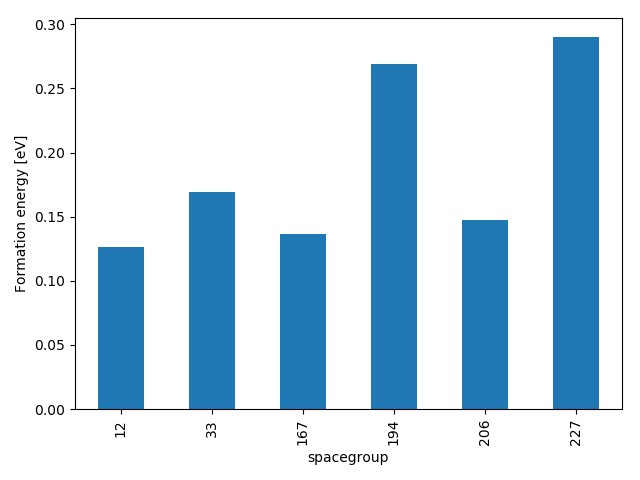

In [741]:
plt.figure()
train.groupby('spacegroup').mean().formation_energy_ev_natom.plot.bar()

plt.ylabel("Formation energy [eV]")
plt.tight_layout()

In [742]:
group_list=list(train.spacegroup.unique())

<IPython.core.display.Javascript object>


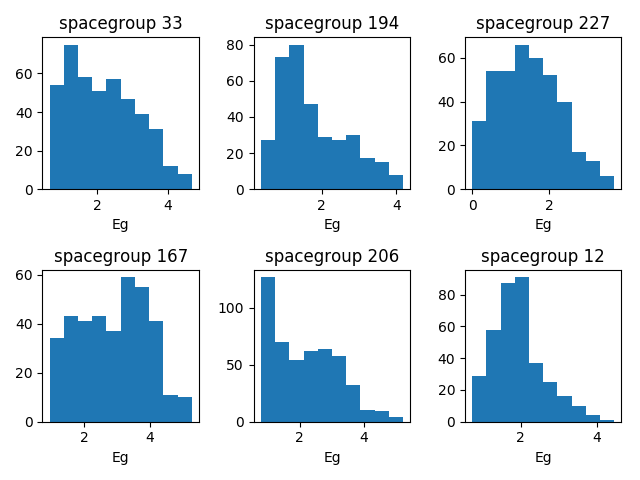

In [743]:
plt.figure()
for i in range(len(group_list)):
    plt.subplot(2,3,i+1)
    plt.hist(train[train.spacegroup==group_list[i]].bandgap_energy_ev)
    plt.title("spacegroup "+str(group_list[i]))
    plt.xlabel('Eg')
plt.tight_layout()
    

<IPython.core.display.Javascript object>


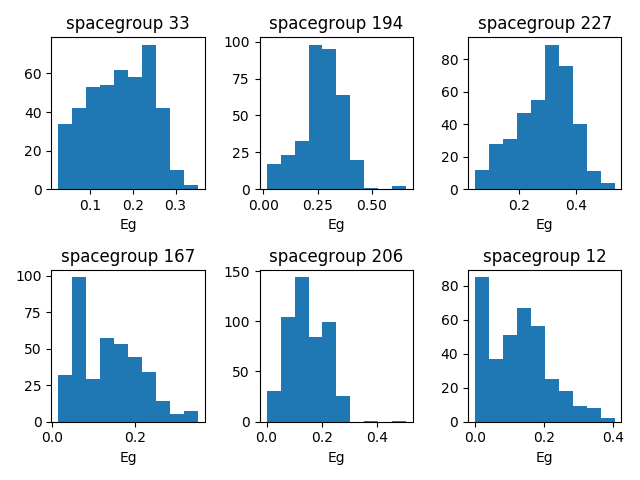

In [744]:
plt.figure()
for i in range(len(group_list)):
    plt.subplot(2,3,i+1)
    plt.hist(train[train.spacegroup==group_list[i]].formation_energy_ev_natom)
    plt.title("spacegroup "+str(group_list[i]))
    plt.xlabel('Eg')
plt.tight_layout()
    

<IPython.core.display.Javascript object>


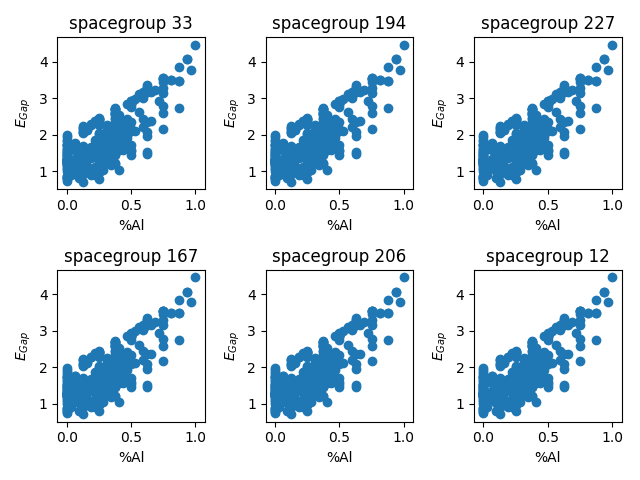

In [745]:
plt.figure()
for i in range(len(group_list)):
    plt.subplot(2,3,i+1)
    plt.scatter(train[train.spacegroup==12].percent_atom_al,train[train.spacegroup==12].bandgap_energy_ev)
    plt.title("spacegroup "+str(group_list[i]))
    plt.xlabel('%Al')
    plt.ylabel('$E_{Gap}$')
plt.tight_layout()

<IPython.core.display.Javascript object>


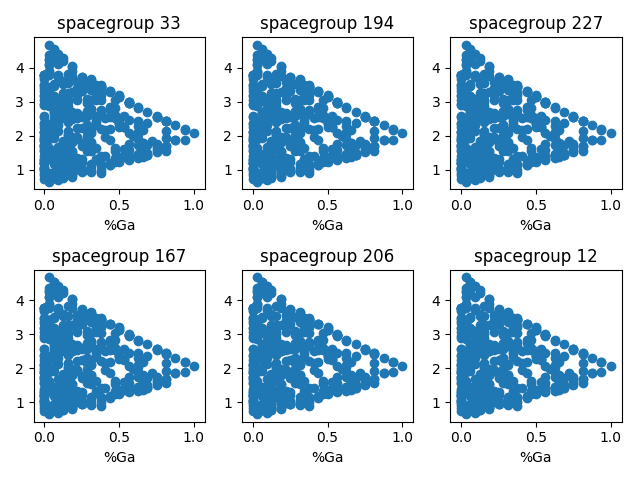

In [746]:
plt.figure()
for i in range(len(group_list)):
    plt.subplot(2,3,i+1)
    plt.scatter(train[train.spacegroup==33].percent_atom_ga,train[train.spacegroup==33].bandgap_energy_ev)
    plt.title("spacegroup "+str(group_list[i]))
    plt.xlabel('%Ga')
plt.tight_layout()

<IPython.core.display.Javascript object>


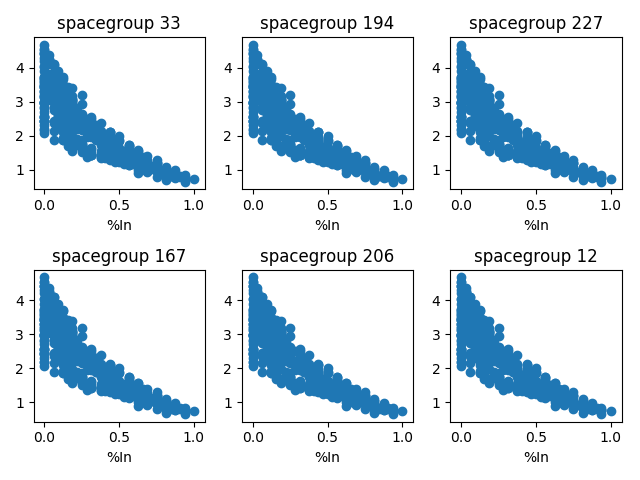

In [747]:
plt.figure()
for i in range(len(group_list)):
    plt.subplot(2,3,i+1)
    plt.scatter(train[train.spacegroup==33].percent_atom_in,train[train.spacegroup==33].bandgap_energy_ev)
    plt.title("spacegroup "+str(group_list[i]))
    plt.xlabel('%In')
plt.tight_layout()

In [748]:
space_groups=pd.get_dummies(train.spacegroup)
one.head()


,12,33,167,194,206,227
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [749]:
num_atoms=pd.get_dummies(train.number_of_total_atoms)
num_atoms.head()

,10.0,20.0,30.0,40.0,60.0,80.0
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [750]:
train_one=pd.concat([train, space_groups,num_atoms ],axis=1)
train_one.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,...,167,194,206,227,10.0,20.0,30.0,40.0,60.0,80.0
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,...,0,0,0,0,0,0,0,0,0,1
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,...,0,1,0,0,0,0,0,0,0,1
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,...,0,0,0,1,0,0,0,1,0,0
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,...,1,0,0,0,0,0,1,0,0,0
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,...,0,1,0,0,0,0,0,0,0,1


In [751]:
train_one=train_one.set_index('id')

In [752]:
train_one.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,167,194,206,227,10.0,20.0,30.0,40.0,60.0,80.0
id,,,,,,,,,,,,,,,,,,,,,
1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,...,0,0,0,0,0,0,0,0,0,1
2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,...,0,1,0,0,0,0,0,0,0,1
3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,...,0,0,0,1,0,0,0,1,0,0
4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,...,1,0,0,0,0,0,1,0,0,0
5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,...,0,1,0,0,0,0,0,0,0,1


In [753]:
from sklearn.model_selection import train_test_split

In [754]:
train_one.columns

Index([                'spacegroup',      'number_of_total_atoms',
                  'percent_atom_al',            'percent_atom_ga',
                  'percent_atom_in',       'lattice_vector_1_ang',
             'lattice_vector_2_ang',       'lattice_vector_3_ang',
       'lattice_angle_alpha_degree',  'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree',  'formation_energy_ev_natom',
                'bandgap_energy_ev',                           12,
                                 33,                          167,
                                194,                          206,
                                227,                         10.0,
                               20.0,                         30.0,
                               40.0,                         60.0,
                               80.0],
      dtype='object')

In [755]:
train_y=train_one.loc[:,['formation_energy_ev_natom','bandgap_energy_ev']]
train_y.head()

,formation_energy_ev_natom,bandgap_energy_ev
id,,
1,0.0680,3.4387
2,0.2490,2.9210
3,0.1821,2.7438
4,0.2172,3.3492
5,0.0505,1.3793


In [756]:
train_x=train_one.drop(['formation_energy_ev_natom','bandgap_energy_ev','spacegroup','number_of_total_atoms'],axis=1)
train_x.head()

,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,12,...,167,194,206,227,10.0,20.0,30.0,40.0,60.0,80.0
id,,,,,,,,,,,,,,,,,,,,,
1,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0,...,0,0,0,0,0,0,0,0,0,1
2,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0,...,0,1,0,0,0,0,0,0,0,1
3,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0,...,0,0,0,1,0,0,0,1,0,0
4,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0,...,1,0,0,0,0,0,1,0,0,0
5,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0,...,0,1,0,0,0,0,0,0,0,1


In [757]:
X_train, X_test, y_train, y_test = train_test_split( train_x, train_y, test_size=0.20, random_state=42)

In [758]:
y_test.shape

(480, 2)

In [759]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [760]:
linreg = linear_model.LinearRegression()

In [761]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [762]:
y_pred = linreg.predict(X_test)

In [763]:
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [[  9.31513441e+01   9.31176555e+01   9.35256641e+01   1.00715892e-02
   -3.22310338e-01   7.08776003e-03  -1.61908986e-02   8.39982049e-03
    1.17026343e-03  -5.88821958e-01   5.46703029e-01  -1.73956052e-01
   -2.30809675e-01   7.24820687e-01  -2.77936032e-01  -4.12381441e-01
   -3.91987373e-01  -5.84368005e-02   5.01939426e-01  -1.15519252e-01
    4.76385440e-01]
 [ -3.32551757e+02  -3.34480155e+02  -3.36674784e+02   1.06252209e-01
   -4.80644200e-02   2.74414386e-01   8.13413121e-02  -4.28884394e-02
    3.61403547e-03   1.24842520e+00   1.46828001e+00  -3.42532410e-01
   -2.83176292e+00   1.83466412e+00  -1.37707399e+00   2.41624706e+00
   -1.01638222e-01   1.38645091e-01  -6.49716049e-01  -4.81177501e-01
   -1.32236037e+00]]
Mean squared error: 0.06
Variance score: 0.70


In [764]:
y_test.head()

,formation_energy_ev_natom,bandgap_energy_ev
id,,
2038,0.1416,1.6845
1979,0.2079,2.1632
856,0.0387,3.7127
1720,0.1722,3.1032
2020,0.1435,3.2116


In [765]:
y_pred_df=pd.DataFrame(y_pred)

In [766]:
y_pred_df.index=y_test.index
y_pred_df.columns=y_test.columns

In [767]:
y_pred_df.head()

,formation_energy_ev_natom,bandgap_energy_ev
id,,
2038,0.112600,1.976648
1979,0.134214,2.378305
856,0.156620,3.544829
1720,0.318315,2.717595
2020,0.239809,2.656386


<IPython.core.display.Javascript object>


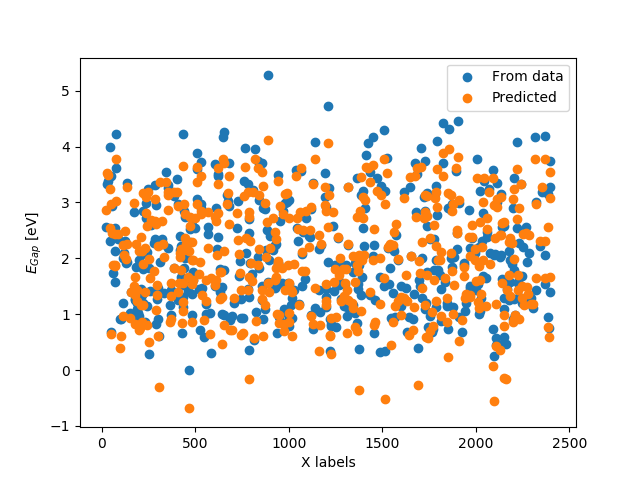

In [768]:
plt.figure()
plt.scatter(y_test.index,y_test.bandgap_energy_ev,label="From data")
plt.scatter(y_pred_df.index,y_pred_df.bandgap_energy_ev,label="Predicted")
plt.legend()
plt.ylabel("$E_{Gap}$ [eV]")
plt.xlabel("X labels")

In [769]:
error=((y_test.bandgap_energy_ev-y_pred_df.bandgap_energy_ev)**2)**0.5

<IPython.core.display.Javascript object>


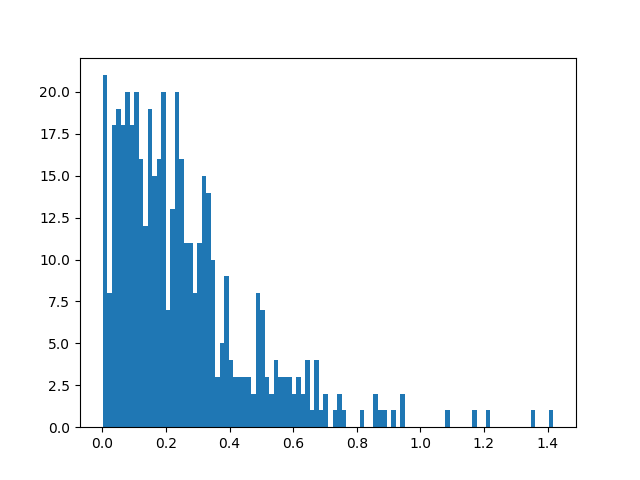

(array([ 21.,   8.,  18.,  19.,  18.,  20.,  18.,  20.,  16.,  12.,  19.,
         15.,  16.,  20.,   7.,  13.,  20.,  16.,  11.,  11.,   8.,  11.,
         15.,  14.,  10.,   3.,   5.,   9.,   4.,   3.,   3.,   3.,   3.,
          2.,   8.,   7.,   3.,   2.,   4.,   3.,   3.,   3.,   2.,   3.,
          2.,   4.,   1.,   4.,   1.,   2.,   0.,   1.,   2.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]), array([  5.80331552e-04,   1.47609219e-02,   2.89415123e-02,
          4.31221027e-02,   5.73026930e-02,   7.14832834e-02,
          8.56638738e-02,   9.98444641e-02,   1.14025055e-01,
          1.28205645e-01,   1.42386235e-01,   1.56566826e-01,
          1.70747416e-01,   1.84928006e-01,   1.99108597e-01,
         

In [770]:
plt.figure()
plt.hist(error,bins=100)
#plt.xscale("log")

In [771]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [772]:
rmsle(y_pred_df,y_test)

formation_energy_ev_natom    0.059887
bandgap_energy_ev            0.165671
dtype: float64

### Let's try on whole dataset and get results for test set

In [773]:
train_one_1=train_one.drop(['spacegroup','number_of_total_atoms'],axis=1)

In [774]:
train_one_1.head()

,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,...,167,194,206,227,10.0,20.0,30.0,40.0,60.0,80.0
id,,,,,,,,,,,,,,,,,,,,,
1,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,...,0,0,0,0,0,0,0,0,0,1
2,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,...,0,1,0,0,0,0,0,0,0,1
3,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,...,0,0,0,1,0,0,0,1,0,0
4,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,...,1,0,0,0,0,0,1,0,0,0
5,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,...,0,1,0,0,0,0,0,0,0,1


In [775]:
linreg_trail1= linear_model.LinearRegression()

In [776]:
list(train_one_1.columns)

['percent_atom_al',
 'percent_atom_ga',
 'percent_atom_in',
 'lattice_vector_1_ang',
 'lattice_vector_2_ang',
 'lattice_vector_3_ang',
 'lattice_angle_alpha_degree',
 'lattice_angle_beta_degree',
 'lattice_angle_gamma_degree',
 'formation_energy_ev_natom',
 'bandgap_energy_ev',
 12,
 33,
 167,
 194,
 206,
 227,
 10.0,
 20.0,
 30.0,
 40.0,
 60.0,
 80.0]

In [777]:
train_x=train_one_1.drop(['bandgap_energy_ev','formation_energy_ev_natom'],axis=1)
train_y=train_one_1[['formation_energy_ev_natom','bandgap_energy_ev']]

In [778]:
linreg_trail1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [779]:
linreg_trail1.predict(train_x)

array([[ 0.16330213,  3.1699388 ],
       [ 0.24548638,  2.66275492],
       [ 0.25611942,  2.63682632],
       ..., 
       [ 0.11513444,  3.0625094 ],
       [ 0.1870357 ,  1.67740119],
       [ 0.19000675,  3.77551623]])

In [780]:
rmsle(linreg_trail1.predict(train_x),train_y)

formation_energy_ev_natom    0.057072
bandgap_energy_ev            0.152234
dtype: float64

In [781]:
test=pd.read_csv("test.csv")

In [782]:
one_space=pd.get_dummies(test.spacegroup)
one_num_atoms=pd.get_dummies(test.number_of_total_atoms)
one_space.head()


,12,33,167,194,206,227
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [783]:
one_num_atoms.head()

,10.0,20.0,30.0,40.0,60.0,80.0
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [784]:
test_one=pd.concat([test,one_space,one_num_atoms],axis=1)

In [785]:
test_one.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,...,167,194,206,227,10.0,20.0,30.0,40.0,60.0,80.0
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,...,0,0,0,0,0,0,0,0,0,1
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,...,0,0,0,0,0,0,0,0,0,1
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,...,1,0,0,0,0,0,1,0,0,0
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,...,0,0,0,0,0,0,0,0,0,1
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,...,0,0,0,0,0,0,0,0,0,1


In [786]:
test_one_1=test_one.drop(['spacegroup',"number_of_total_atoms"],axis=1)

In [787]:
test_one_1=test_one_1.set_index('id')

In [788]:
y_test_pred=linreg_trail1.predict(test_one_1)

In [789]:
y_test_pred

array([[ 0.15659299,  1.7116921 ],
       [ 0.18281054,  3.39106531],
       [ 0.15704807,  3.4120538 ],
       ..., 
       [ 0.30716042,  0.24197238],
       [ 0.1922515 ,  2.58871428],
       [ 0.14154131,  2.4207092 ]])

In [790]:
y_test=pd.read_csv("sample_submission.csv")

In [791]:
y_test.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.1779,1.8892
1,2,0.1779,1.8892
2,3,0.1779,1.8892
3,4,0.1779,1.8892
4,5,0.1779,1.8892


In [792]:
y_test.shape

(600, 3)

In [793]:
y_test_pred_df=pd.DataFrame(y_test_pred)

In [794]:
y_test_pred_df.head()

,0,1
0,0.156593,1.711692
1,0.182811,3.391065
2,0.157048,3.412054
3,0.081669,2.946911
4,0.113559,1.653535


In [795]:
y_test_pred_df.columns=['formation_energy_ev_natom','bandgap_energy_ev']

In [796]:
y_test_pred_df['id']=y_test.id

In [797]:
y_test_pred_df.head()

,formation_energy_ev_natom,bandgap_energy_ev,id
0,0.156593,1.711692,1
1,0.182811,3.391065,2
2,0.157048,3.412054,3
3,0.081669,2.946911,4
4,0.113559,1.653535,5


In [798]:
cols = y_test_pred_df.columns.tolist()


In [799]:
cols=['id','formation_energy_ev_natom','bandgap_energy_ev']

In [800]:
y_test_pred_df=y_test_pred_df[cols]

In [801]:
y_test_pred_df.to_csv("trail2.csv",index=False)

In [802]:
df=pd.read_csv("trail2.csv")
df.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.156593,1.711692
1,2,0.182811,3.391065
2,3,0.157048,3.412054
3,4,0.081669,2.946911
4,5,0.113559,1.653535


In [1004]:
train.number_of_total_atoms.unique()

array([ 80.,  40.,  30.,  20.,  60.,  10.])

<IPython.core.display.Javascript object>


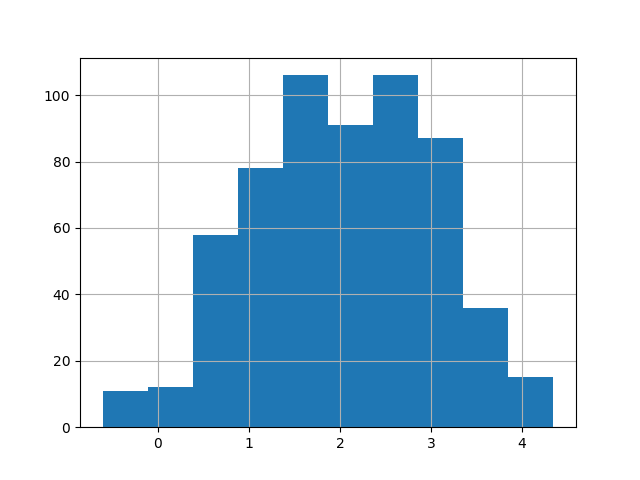

In [804]:
plt.figure()
df.iloc[:,2].hist()

In [805]:
from xgboost.sklearn import XGBRegressor


In [806]:
xgr=XGBRegressor(nthread=-1)
xgr_Eg=XGBRegressor(nthread=-1)
#linreg.fit(X_train, y_train)

In [809]:
X_train.columns

Index([           'percent_atom_al',            'percent_atom_ga',
                  'percent_atom_in',       'lattice_vector_1_ang',
             'lattice_vector_2_ang',       'lattice_vector_3_ang',
       'lattice_angle_alpha_degree',  'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree',                           12,
                                 33,                          167,
                                194,                          206,
                                227,                         10.0,
                               20.0,                         30.0,
                               40.0,                         60.0,
                               80.0],
      dtype='object')

In [810]:
xgr.fit(X=X_train,y=y_train['formation_energy_ev_natom'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [811]:
xgr.score(X_train,y_train['formation_energy_ev_natom'])

0.89114603513955215

In [812]:
y_pred_xgr=xgr.predict(X_train)

In [813]:
y_pred_xgr

array([ 0.34918755,  0.06747392,  0.0950017 , ...,  0.20323956,
        0.14529565,  0.19787538], dtype=float32)

In [814]:
rmsle(y_train['formation_energy_ev_natom'],y_pred_xgr)

0.027527834170669261

In [815]:
xgr_Eg.fit(X=X_train,y=y_train.bandgap_energy_ev)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [816]:
y_pred_xgr_Eg=xgr_Eg.predict(X_train)

In [817]:
print("Formation energy rmsle error in xgboost:")
print(rmsle(y_train['formation_energy_ev_natom'],y_pred_xgr))
print("Bandgap rmsle error in xgboost:")
print(rmsle(y_train.bandgap_energy_ev,y_pred_xgr_Eg))

Formation energy rmsle error in xgboost:
0.0275278341707
Bandgap rmsle error in xgboost:
0.0753272486895


### There is less error in formation energy. Let's try to use formation energy to predict bandgap energy. And see if we can have better results.

In [818]:
xgr_Eg_with_formation=XGBRegressor(nthread=-1)

In [819]:
X_train_formation=X_train

In [820]:
X_train_formation['formation_energy_ev_natom']=xgr.predict(X_train)

In [821]:
xgr_Eg_with_formation.fit(X=X_train_formation,y=y_train.bandgap_energy_ev)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [822]:
y_pred_with_formation=xgr_Eg_with_formation.predict(X_train_formation)

In [823]:
print("Bandgap rmsle error in xgboost:")
print(rmsle(y_train.bandgap_energy_ev,y_pred_xgr_Eg))
print("Bandgap rmsle error in xgboost with formation energy:")
print(rmsle(y_train.bandgap_energy_ev,y_pred_with_formation))

Bandgap rmsle error in xgboost:
0.0753272486895
Bandgap rmsle error in xgboost with formation energy:
0.0740448898268


### Now let's train for all data and submit it

In [824]:
xgr_Ef_final=XGBRegressor(nthread=-1)
xgr_Eg_final=XGBRegressor(nthread=-1)

In [825]:
xgr_Ef_final.fit(train_x,train_y.formation_energy_ev_natom)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [826]:
y_formation=xgr_Ef_final.predict(train_x)

In [835]:
train_x_Eg=train_x.copy()
train_x_Eg['formation_energy_ev_natom']=y_formation # only predicted values are being used
train_x_Eg.head()

,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,12,...,194,206,227,10.0,20.0,30.0,40.0,60.0,80.0,formation_energy_ev_natom
id,,,,,,,,,,,,,,,,,,,,,
1,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0,...,0,0,0,0,0,0,0,0,1,0.070459
2,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0,...,1,0,0,0,0,0,0,0,1,0.224183
3,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0,...,0,0,1,0,0,0,1,0,0,0.170288
4,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0,...,0,0,0,0,0,1,0,0,0,0.211463
5,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0,...,1,0,0,0,0,0,0,0,1,0.091986


In [841]:
train_x.columns

Index([           'percent_atom_al',            'percent_atom_ga',
                  'percent_atom_in',       'lattice_vector_1_ang',
             'lattice_vector_2_ang',       'lattice_vector_3_ang',
       'lattice_angle_alpha_degree',  'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree',                           12,
                                 33,                          167,
                                194,                          206,
                                227,                         10.0,
                               20.0,                         30.0,
                               40.0,                         60.0,
                               80.0],
      dtype='object')

In [837]:
xgr_Eg_final.fit(X=train_x_Eg,y=train_y.bandgap_energy_ev)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [838]:
y_formation_final=xgr_Ef_final.predict(test_one_1)


In [844]:
test_one_1.head()

,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,12,...,167,194,206,227,10.0,20.0,30.0,40.0,60.0,80.0
id,,,,,,,,,,,,,,,,,,,,,
1,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006,0,...,0,0,0,0,0,0,0,0,0,1
2,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015,0,...,0,0,0,0,0,0,0,0,0,1
3,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014,0,...,1,0,0,0,0,0,1,0,0,0
4,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002,1,...,0,0,0,0,0,0,0,0,0,1
5,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001,1,...,0,0,0,0,0,0,0,0,0,1


In [845]:
test_one_1_formation=test_one_1.copy()
test_one_1_formation['formation_energy_ev_natom']=y_formation_final
y_gap_final=xgr_Eg_final.predict(test_one_1_formation)

In [849]:
y_gap=xgr_Eg_final.predict(train_x_Eg)

### Final results

In [850]:
print("Formation energy rmsle error in xgboost:")
print(rmsle(train_y['formation_energy_ev_natom'],y_formation))
print("Bandgap rmsle error in xgboost:")
print(rmsle(train_y.bandgap_energy_ev,y_gap))

Formation energy rmsle error in xgboost:
0.0289092969105
Bandgap rmsle error in xgboost:
0.0774744332205


In [851]:
ans=pd.DataFrame({'id':test_one_1.index,'formation_energy_ev_natom':y_formation_final ,'bandgap_energy_ev':y_gap_final})

In [852]:
ans.to_csv("train3_xgboost.csv",index=False)

In [853]:
df=pd.read_csv("train3_xgboost.csv")
df.head()

,bandgap_energy_ev,formation_energy_ev_natom,id
0,1.515095,0.205387,1
1,3.709685,0.065329,2
2,3.525871,0.161519,3
3,2.964722,0.024251,4
4,1.485514,0.148768,5


## we just used default xgboost setting . After submitting results in kaggle our score is 0.0571 which places us in 16 position. Not bad at all. 
### Now, we can tune some parameters to improve xgboost

In [854]:
from sklearn.model_selection import GridSearchCV


In [855]:
xgr_gc=XGBRegressor(nthread=-1)



In [856]:
xgr_gc

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [857]:
parameters={'max_depth':[2,3,4,5,6,7,8],'n_estimators':[10,20,40,80,100,200,400],'learning_rate':[0.01,0.05,0.1,0.2,0.4]}

In [858]:
csv=GridSearchCV(xgr_gc,param_grid=parameters,cv=10)

In [860]:
csv.fit(train_x,train_y.formation_energy_ev_natom)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8], 'n_estimators': [10, 20, 40, 80, 100, 200, 400], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [863]:
csv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [864]:
csv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [865]:
GV_scores=pd.DataFrame(csv.cv_results_['params'])


In [866]:
GV_scores['mean_test_score']=csv.cv_results_['mean_test_score']
GV_scores['mean_train_score']=csv.cv_results_['mean_train_score']

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [868]:
GV_scores.sort_values('mean_test_score',ascending=False).head(10)

,learning_rate,max_depth,n_estimators,mean_test_score,mean_train_score
163,0.20,4,40,0.844969,0.894412
68,0.05,4,200,0.844059,0.899562
115,0.10,4,80,0.843985,0.894556
67,0.05,4,100,0.843892,0.883795
62,0.05,3,400,0.843705,0.895634
61,0.05,3,200,0.843356,0.879171
116,0.10,4,100,0.843073,0.899525
104,0.10,2,400,0.842408,0.889563
109,0.10,3,100,0.842133,0.879307
157,0.20,3,80,0.842022,0.891582


In [869]:
csv.best_estimator_.score(X_train,y_train.formation_energy_ev_natom)

ValueError: feature_names mismatch: ['percent_atom_al', 'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang', 'lattice_vector_2_ang', 'lattice_vector_3_ang', 'lattice_angle_alpha_degree', 'lattice_angle_beta_degree', 'lattice_angle_gamma_degree', '12', '33', '167', '194', '206', '227', '10.0', '20.0', '30.0', '40.0', '60.0', '80.0'] ['percent_atom_al', 'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang', 'lattice_vector_2_ang', 'lattice_vector_3_ang', 'lattice_angle_alpha_degree', 'lattice_angle_beta_degree', 'lattice_angle_gamma_degree', '12', '33', '167', '194', '206', '227', '10.0', '20.0', '30.0', '40.0', '60.0', '80.0', 'formation_energy_ev_natom']
training data did not have the following fields: formation_energy_ev_natom

In [871]:
y_pred_Ef=csv.best_estimator_.predict(train_x)

In [872]:
rmsle(y_pred_Ef,train_y.formation_energy_ev_natom)

0.027427179091804605

### It seems that best configuration is : n_estimators=20, learning_rate=0.1, max_depth=3
### Now let's use formation energy parameters and train for Eg


In [873]:
xgr_gc=XGBRegressor(nthread=-1)
xgr_gc_eg=XGBRegressor(nthread=-1)

In [874]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error

In [875]:

#scoring={'rmsle':make_scorer(rmsle),'rmse':make_scorer(mean_squared_error),'r2':make_scorer(r2_score)}
scoring='neg_mean_squared_log_error' # negative mean square log error. GridSearchCV always show highest score metrics

In [876]:
parameters={'max_depth':[2,3,4,5],'n_estimators':[10,20,40,80,100,200,400],'learning_rate':[0.01,0.05,0.1,0.2]}

In [877]:
csv=GridSearchCV(xgr_gc,param_grid=parameters,cv=10,scoring='neg_mean_squared_log_error')

In [878]:
csv.fit(train_x,train_y.formation_energy_ev_natom)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5], 'n_estimators': [10, 20, 40, 80, 100, 200, 400], 'learning_rate': [0.01, 0.05, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [879]:
csv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [880]:
csv.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [881]:
df_csv=pd.DataFrame(csv.cv_results_['params'])
df_csv['mean_test_score']=csv.cv_results_['mean_test_score']
df_csv['mean_train_score']=csv.cv_results_['mean_train_score']
#df_csv['r2']=csv.cv_results_['mean_test_r2']

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [882]:
df_csv.sort_values('mean_test_score',ascending=False).head(10)

,learning_rate,max_depth,n_estimators,mean_test_score,mean_train_score
100,0.20,4,40,-0.001066,-0.000727
47,0.05,4,200,-0.001069,-0.000690
73,0.10,4,80,-0.001070,-0.000725
41,0.05,3,400,-0.001073,-0.000718
74,0.10,4,100,-0.001074,-0.000691
46,0.05,4,100,-0.001080,-0.000804
40,0.05,3,200,-0.001082,-0.000834
62,0.10,2,400,-0.001086,-0.000761
68,0.10,3,200,-0.001087,-0.000714
94,0.20,3,80,-0.001088,-0.000747


In [887]:
xgr_final_ef=XGBRegressor(nthread=-1,learning_rate=0.2,max_depth=4,n_estimators=40)

xgr_final_ef.fit(train_x,train_y.formation_energy_ev_natom)
y_formation_pred=xgr_final_ef.predict(train_x)

In [907]:
print("Formation energy rmsle error:")
rmsle(y_formation_pred,train_y.formation_energy_ev_natom)

Formation energy rmsle error:


0.027427179091804605

In [892]:
train_x_Eg=train_x.copy()
train_x_Eg['formation_energy_ev_natom']=y_formation_pred

In [893]:
xgr_gc_eg=XGBRegressor(nthread=-1)

In [894]:
csv_eg=GridSearchCV(xgr_gc_eg,param_grid=parameters,cv=10,scoring='neg_mean_squared_log_error')

In [895]:
csv_eg.fit(train_x_Eg,train_y.bandgap_energy_ev)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5], 'n_estimators': [10, 20, 40, 80, 100, 200, 400], 'learning_rate': [0.01, 0.05, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [896]:
csv_eg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [897]:
df_csv_eg=pd.DataFrame(csv_eg.cv_results_['params'])
df_csv_eg['mean_test_score']=csv_eg.cv_results_['mean_test_score']
df_csv_eg['mean_train_score']=csv_eg.cv_results_['mean_train_score']
#df_csv['r2']=csv_eg.cv_results_['mean_test_r2']

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [898]:
df_csv_eg.sort_values('mean_test_score',ascending=False).head(10)

,learning_rate,max_depth,n_estimators,mean_test_score,mean_train_score
41,0.05,3,400,-0.007512,-0.004237
47,0.05,4,200,-0.007533,-0.004047
62,0.10,2,400,-0.007546,-0.004592
89,0.20,2,200,-0.007581,-0.004682
68,0.10,3,200,-0.007611,-0.004231
74,0.10,4,100,-0.007661,-0.004079
100,0.20,4,40,-0.007672,-0.004477
73,0.10,4,80,-0.007673,-0.004454
46,0.05,4,100,-0.007731,-0.005256
53,0.05,5,100,-0.007751,-0.003921


In [900]:
xgr_gc_eg_final=XGBRegressor(nthread=-1,learning_rate=0.05,max_depth=3,n_estimators=400)
xgr_gc_eg_final.fit(train_x_Eg,train_y.bandgap_energy_ev)
#y_gap_pred=xgr_final_ef.predict(train_x_Eg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [903]:
train_x_Eg.columns

Index([           'percent_atom_al',            'percent_atom_ga',
                  'percent_atom_in',       'lattice_vector_1_ang',
             'lattice_vector_2_ang',       'lattice_vector_3_ang',
       'lattice_angle_alpha_degree',  'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree',                           12,
                                 33,                          167,
                                194,                          206,
                                227,                         10.0,
                               20.0,                         30.0,
                               40.0,                         60.0,
                               80.0,  'formation_energy_ev_natom'],
      dtype='object')

In [904]:
y_gap_pred=xgr_gc_eg_final.predict(train_x_Eg)

In [906]:
print("Egap rmsle error:")
rmsle(y_gap_pred,train_y.bandgap_energy_ev)

Egap rmsle error:


0.065954833166161714

# Now lets get results for test set and submit results

In [910]:
test_one_1.columns

Index([           'percent_atom_al',            'percent_atom_ga',
                  'percent_atom_in',       'lattice_vector_1_ang',
             'lattice_vector_2_ang',       'lattice_vector_3_ang',
       'lattice_angle_alpha_degree',  'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree',                           12,
                                 33,                          167,
                                194,                          206,
                                227,                         10.0,
                               20.0,                         30.0,
                               40.0,                         60.0,
                               80.0],
      dtype='object')

In [911]:
y_ef=xgr_final_ef.predict(test_one_1)

In [912]:
test_one_1_Eg=test_one_1.copy()
test_one_1_Eg['formation_energy_ev_natom']=y_ef

In [913]:
y_eg=xgr_gc_eg_final.predict(test_one_1_Eg)

In [915]:
submission=pd.read_csv('sample_submission.csv')
submission.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.1779,1.8892
1,2,0.1779,1.8892
2,3,0.1779,1.8892
3,4,0.1779,1.8892
4,5,0.1779,1.8892


In [920]:
ans=pd.DataFrame({'id':test.id,'formation_energy_ev_natom':y_ef,'bandgap_energy_ev':y_eg})

In [922]:
cols=submission.columns
ans=ans[cols]
ans.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.201122,1.578208
1,2,0.054370,3.722534
2,3,0.160584,3.541123
3,4,0.030152,2.948523
4,5,0.140840,1.524136


In [924]:
ans.to_csv('trail4_xgboost_gridsearch.csv',index=False)
df=pd.read_csv('trail4_xgboost_gridsearch.csv')
df.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.201122,1.578208
1,2,0.054370,3.722534
2,3,0.160584,3.541123
3,4,0.030152,2.948523
4,5,0.140840,1.524136


### With parameter optimization (GridSearchCv) :  rmsle :0.0571, number :18 in the leader board,

### With parameter optimization (GridSearchCv) :  rmsle :0.0558, number :9 in the leader board,

## Optimization helps to become get position in top 10!

## Now let's check which features are most important for formation energy

In [979]:
plt.close('all')
plt.clf()
plt.cla()

In [1000]:
Ef_feature_importances_= xgr_final_ef.feature_importances_
index_ef=train_x.columns

In [1001]:
x=[i for i in range(len(Ef_feature_importances_))]

<IPython.core.display.Javascript object>


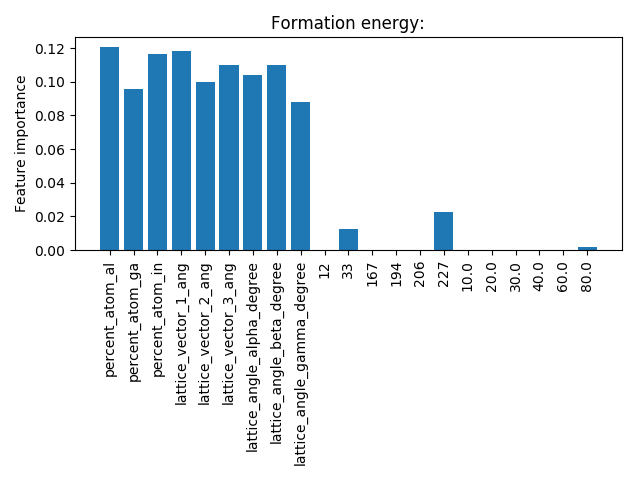

In [1002]:
plt.figure()
plt.bar(x,height=Ef_feature_importances_)
plt.xticks(x, index_ef,rotation='vertical')
plt.ylabel("Feature importance")
plt.title("Formation energy:")
plt.tight_layout()
plt.show()
plt.close()

<IPython.core.display.Javascript object>


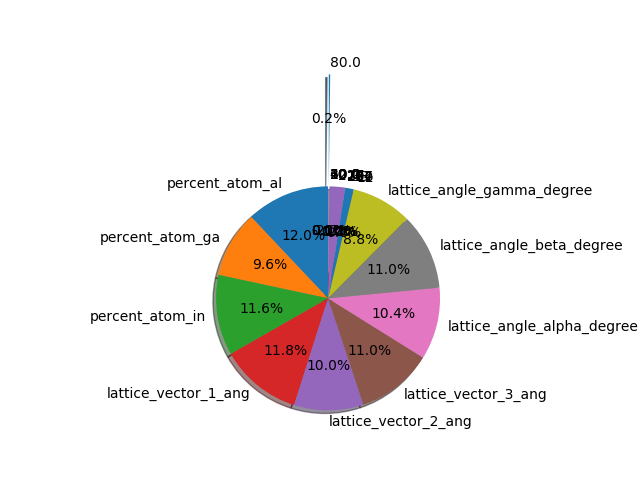

In [1003]:
explode=[0 for i in range(len(index_ef))]
explode[-1]=1
fig1, ax1 = plt.subplots()
ax1.pie(Ef_feature_importances_, explode=explode, labels=index_ef, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [989]:
Eg_feature_importances_= xgr_gc_eg_final.feature_importances_
index=train_x_Eg.columns
x=[i for i in range(len(index))]

<IPython.core.display.Javascript object>


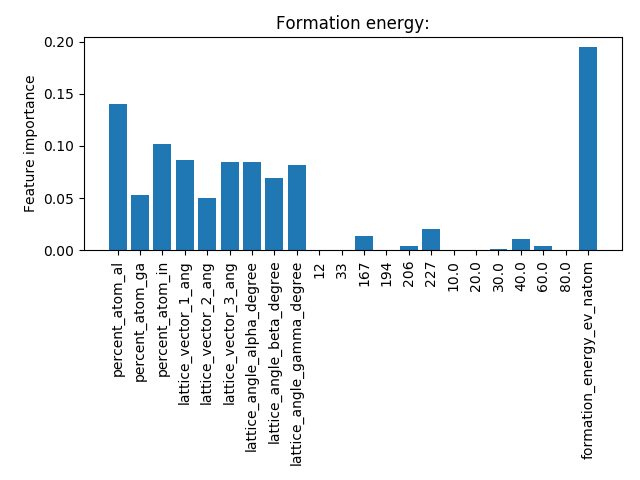

In [993]:
plt.figure()
plt.bar(x,height=Eg_feature_importances_)
plt.xticks(x, index,rotation='vertical')
plt.ylabel("Feature importance")
plt.title("Formation energy:")
plt.tight_layout()
plt.show()
plt.close()

<IPython.core.display.Javascript object>


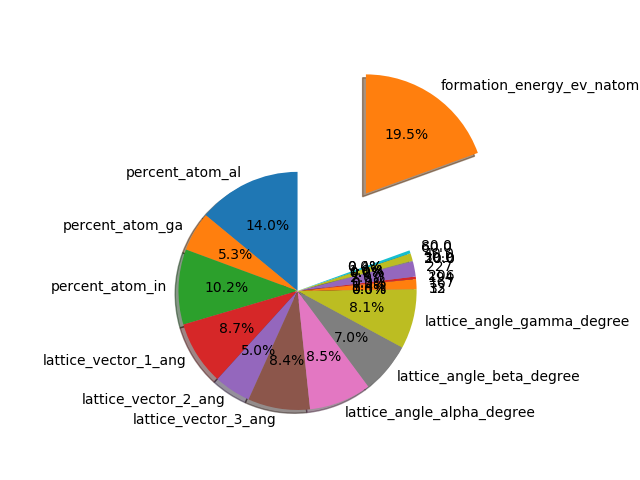

In [999]:
explode=[0 for i in range(len(index))]
explode[-1]=1
fig1, ax1 = plt.subplots()
ax1.pie(Eg_feature_importances_, explode=explode, labels=index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<IPython.core.display.Javascript object>


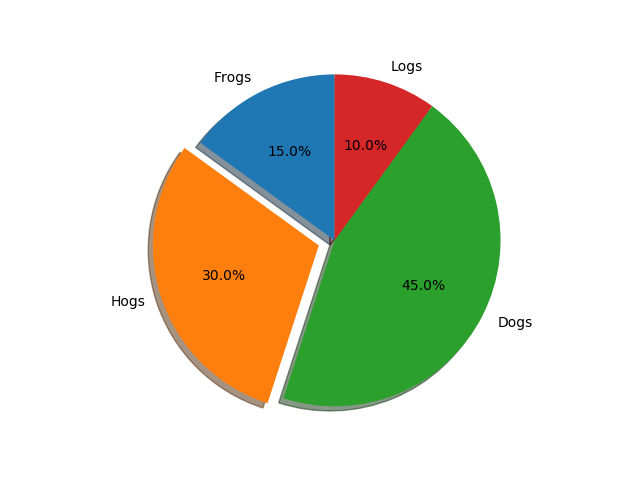

In [998]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
plt.close()